FOR NON LINEAR DATA WE USE " DECISION tREE REGRESSION "

- When our data is scattered/distributed( so we dont use linear regression we use decision tree)

------------CART------------
1.) CLASSIFICATION TREES
2.) REGRESSION TREES

#step1 import lib
#data load
#preprocessing(skipped in this)
#feature selection(x,y) and split into xtrain,ytrain,xtest,ytest
#algorithm instantiate and fit
#score and ohter metrics
#visualization
#save the model


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px #for three dimension graphs
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load

In [21]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [22]:
#previsualization
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price')

In [23]:
#feature selection
X=df[['Mendacium','Depth']]
y=df[['Price']]
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [24]:
#algo instantiate
model=DecisionTreeRegressor(max_depth=25)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=25)

In [25]:
print("score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mse:",mean_absolute_error(y,pred))

score: 92.45169332448044
mse: 15.710547442726684
mse: 1.4105800774


<AxesSubplot:ylabel='Density'>

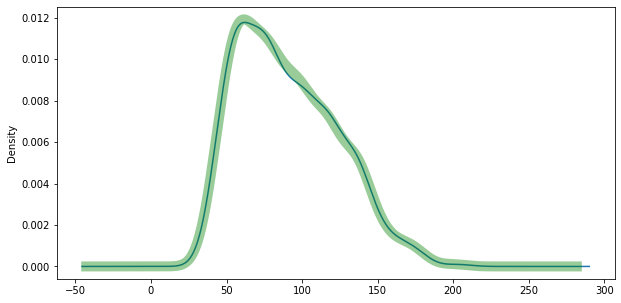

In [26]:
#visualization
df['p1']=pred
ax=df['Price'].plot(kind='kde',figsize=(10,5))

df['p1'].plot(kind='kde',ax=ax,alpha=.4,color='green',linewidth=10)

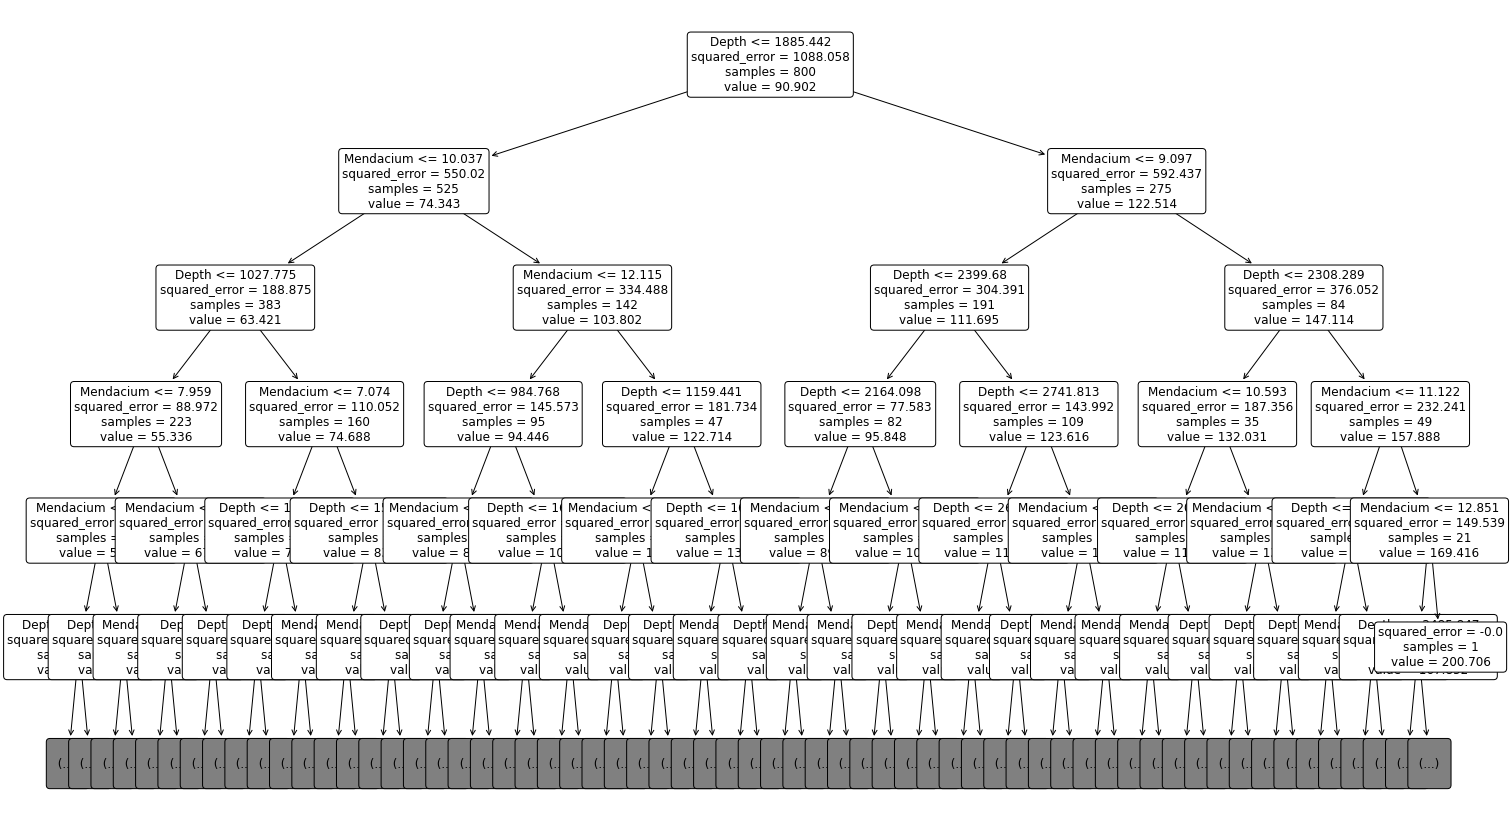

In [27]:
#PLOT TREE FUNCTION
plt.figure(figsize=(25,15))
plot_tree(model,max_depth=5,fontsize=12,feature_names=['Mendacium','Depth'],rounded=True)
plt.show()

In [28]:
dump(model,"oil_pricing.pkl")

['oil_pricing.pkl']